<a href="https://colab.research.google.com/github/ernese/Deep-Learning-AUT2020/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import metrics
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

print(tf.__version__)
print(keras.__version__)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2.2.0-rc2
2.3.0-tf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mnist=tf.keras.datasets.mnist

(X_train,y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


In [0]:
labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print(np.shape(X_train))
print(np.shape(X_test))

(60000, 28, 28)
(10000, 28, 28)


In [0]:
valid_images = X_train[:5000].astype('float32') / 255.0
valid_labels = y_train[:5000]

train_images = X_train[5000:].astype('float32') / 255.0
train_labels = y_train[5000:]

test_images = X_test.astype('float32') / 255.0

print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [0]:
valid_images=valid_images.reshape(-1,28,28)
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

print("Validation data after reshaping:{}".format(np.shape(valid_images)))
print("Train data after reshaping:{}".format(np.shape(X_train)))
print("Test data after reshaping :{}".format(np.shape(X_test)))

Validation data after reshaping:(5000, 28, 28)
Train data after reshaping:(60000, 28, 28)
Test data after reshaping :(10000, 28, 28)


Epoch 1/15
600/600 [==============================] - 14s 23ms/step - loss: 0.4035 - accuracy: 0.8824 - val_loss: 0.9549 - val_accuracy: 0.6928
Epoch 2/15
600/600 [==============================] - 14s 23ms/step - loss: 0.2459 - accuracy: 0.9248 - val_loss: 0.7063 - val_accuracy: 0.7856
Epoch 3/15
600/600 [==============================] - 14s 23ms/step - loss: 0.2198 - accuracy: 0.9320 - val_loss: 0.7176 - val_accuracy: 0.7918
Epoch 4/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1992 - accuracy: 0.9379 - val_loss: 0.4848 - val_accuracy: 0.8386
Epoch 5/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1889 - accuracy: 0.9405 - val_loss: 0.3495 - val_accuracy: 0.8916
Epoch 6/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1719 - accuracy: 0.9462 - val_loss: 0.3917 - val_accuracy: 0.8796
Epoch 7/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1611 - accuracy: 0.9488 - val_loss: 0.3066 - val_accuracy:

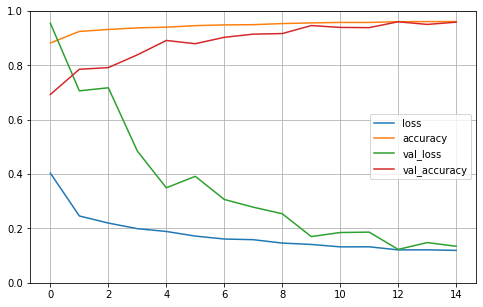

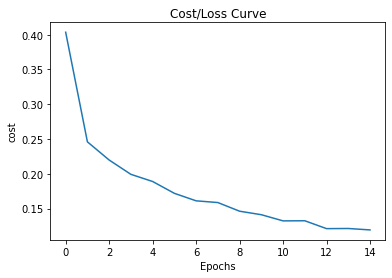


# Evaluate on test data
313/313 [==============================] - 1s 4ms/step - loss: 0.1345 - accuracy: 0.9588
test loss, test acc: [0.13449549674987793, 0.9588000178337097]


In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.sigmoid),
                                    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.sigmoid), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#Adam
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, y_train, epochs=15, batch_size=100, validation_data=(valid_images, valid_labels))

model.summary()

pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

print('\n# Evaluate on test data')
results=model.evaluate(X_test,y_test)
print('test loss, test acc:', results)

Epoch 1/15
600/600 [==============================] - 14s 23ms/step - loss: 0.4579 - accuracy: 0.8748 - val_loss: 0.5173 - val_accuracy: 0.8948
Epoch 2/15
600/600 [==============================] - 14s 23ms/step - loss: 0.2458 - accuracy: 0.9305 - val_loss: 0.4307 - val_accuracy: 0.9026
Epoch 3/15
600/600 [==============================] - 14s 23ms/step - loss: 0.2060 - accuracy: 0.9418 - val_loss: 0.3799 - val_accuracy: 0.9148
Epoch 4/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1818 - accuracy: 0.9476 - val_loss: 0.3589 - val_accuracy: 0.9208
Epoch 5/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1644 - accuracy: 0.9523 - val_loss: 0.3369 - val_accuracy: 0.9226
Epoch 6/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1507 - accuracy: 0.9569 - val_loss: 0.3005 - val_accuracy: 0.9312
Epoch 7/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1419 - accuracy: 0.9586 - val_loss: 0.2895 - val_accuracy:

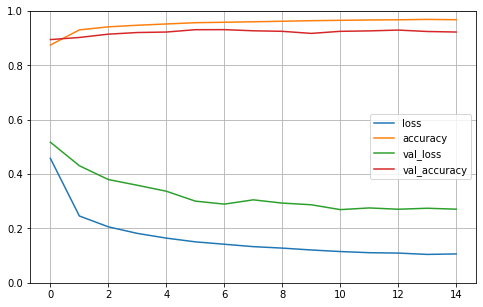

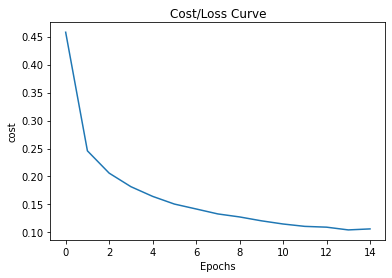


# Evaluate on test data
313/313 [==============================] - 2s 5ms/step - loss: 0.1332 - accuracy: 0.9599
test loss, test acc: [0.13323670625686646, 0.9599000215530396]


In [0]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(512, activation=tf.nn.tanh), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.tanh), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#SGD
model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

H=model1.fit(X_train, y_train, epochs=15, batch_size=100, validation_data=(valid_images, valid_labels))

model1.summary()

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

print('\n# Evaluate on test data')
results=model1.evaluate(X_test,y_test)
print('test loss, test acc:', results)